<a href="https://colab.research.google.com/github/motorio0829/Programming-for-AI-25-1/blob/main/Lecture12_Linear_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scipy & statsmodels

* `scipy`
    * 고급 수학 함수, 수치적 미적분, 미분 방정식 계산, 최적화, 신호 처리 등에 사용하는 다양한 과학 기술 계산 기능을 제공

* `statsmodels`
    * 검정 및 추정 , 회귀분석, 시계열분석등의 다양한 통계분석 기능을 제공
    * `patsy` 패키지를 포함 ("y ~ x1 + x2" 수식 문법 사용 가능)
        * pasty를 통해 기존에 R에서만 가능했던 회귀분석과 시계열분석 방법론을 파이썬에서도 이용 가능
    * 예제 데이터셋, 검정 및 모수추정, 회귀분석, 선형회귀, 강건회귀, 일반화 선형모형, 혼합효과모형, 이산종속변수, 시계열 분석, SARIMAX 모형, 상태공간 모형, 벡터 AR 모형, 생존분석, 요인분석
        * SARIMAX model (seasonal autoregressive integrated moving average /exogenous model) AR모형과 MA모형을 동시에 포함되게 됩니다. 일반적인 AR이나 MA모형은 Univariate(단변량) 시계열을 표현하는데 적절한 모형이지만 ARIMAX모형은 추가적인 Explanatory variable을 활요함으로써 다변량 시계열 데이터를 활용하기에 적절한 모형입니다.

In [ ]:
import scipy.stats as sp
import statsmodels.api as sm

# 정규성 검정

* 모수적 검정 vs. 비모수적 검정
    * 모수적 검정(parametric test): 정규분포 등 알려진 모수적 분포 하에서 수행하는 검정
    * 비모수적 검정(nonparametric test): 모수적 분포를 가정할 수 없어, 순위(rank) 등을 이용하여 모수분포 가정 없이 수행하는 검정


군별 표본수 | 판단방법
:--- | :---
N < 10 | 비모수적 검정 선택
10 ≤ N < 30 | 정규성 판단 후 선택
N ≥ 30 | 1. 정규성 검정 후 판단 <br><br> 2. 중심극한정리에 의해 모수적 검정 선택 <br><br> 3. 심하게 왜곡된 분포나 이상치가 많은 경우 비모수적 검정 선택

<br>

* 정규성 판단
    1. plot (histogram, boxplot, QQplot)
    2. 통계적 검정
        * H0: 정규성을 따른다
        * H1: 정규성을 따르지 않는다




## plot

In [ ]:
# random number generation
import numpy as np
np.random.seed(10)
x = np.random.normal(loc=0, scale=1, size=1000)

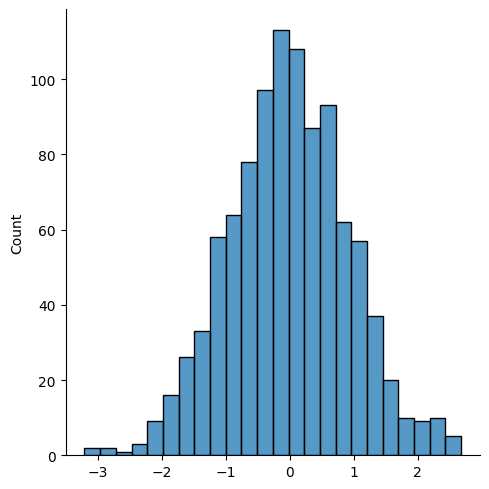

In [ ]:
# Histogram
import seaborn as sns
sns.displot(x);

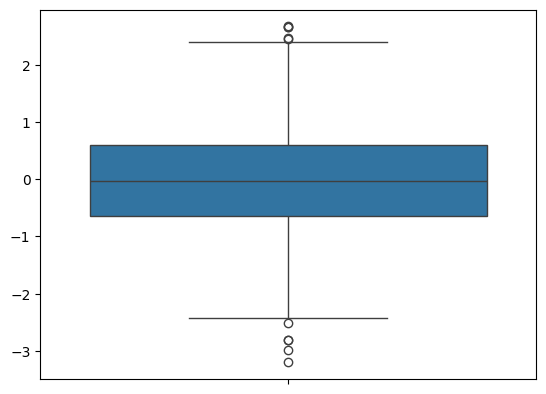

In [ ]:
# boxplot
sns.boxplot(x);

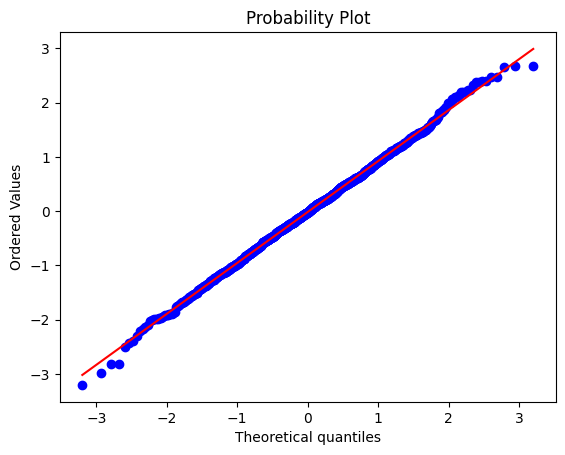

In [ ]:
# QQ plot
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(x, dist=stats.norm, plot=plt);

## 정규성 검정


* 정규성 검정 종류
    1. Shapiro-Wilk test
        * 대표본에서는 작은 정규성 이탈에도 민감한 편
        * 3 ≤ N < 5000 일 때, 검정 가능
    2. Kolmogorov-Smirnov test
        * 큰 자료에서 사용
        * 자료의 누적빈도를 통해 통계량 계산
        * 이상치의 영향을 받는 편

In [ ]:
# Shapiro-Wilk test
from scipy.stats import shapiro
shapiro(x)
# help(shapiro)  # output이 무엇인지 확인 (return)
stat, p = shapiro(x)

print("stat=%.3f, p=%.3f" % (stat, p))
if p > 0.05:
    print("정규성 가정 만족")
else :
    print("정규성 가정 불만족")

stat=0.999, p=0.695
정규성 가정 만족


In [ ]:
# Kolmogorov-Smirnov test
# - alternative="two-sided" : F(x) != G(x) for all x 검정
# - alternative="less": F(x) < G(x) for all x 검정
# - alternative="greater": F(x) > G(x) for all x 검정
from scipy.stats import kstest
stat, p = kstest(x, cdf="norm", alternative="two-sided")
print("p=%.3f" % p)
print(["정규성 가정 만족" if p>=0.05 else "정규성 가정 불만족"])

p=0.243
['정규성 가정 만족']


# 연관성 분석

질문 | 분석방법 예시
:--- | :---
연령과 혈압은 어떤 관계가 있을까? | correlation analysis
혈압에 영향을 미치는 인자는 무엇일까? | Linear regression analysis
고혈압 유무에 영향을 미치는 인자는 무엇일까? | Logistic regression analysis
고혈압 발생율에 영향을 미치는 인자는 무엇일까? | Poisson regression analysis
고혈압 환자의 생존율에 영향을 미치는 인자는 무엇일까? | Cox proportional hazard regression analysis

# 상관분석

* 상관관계 종류

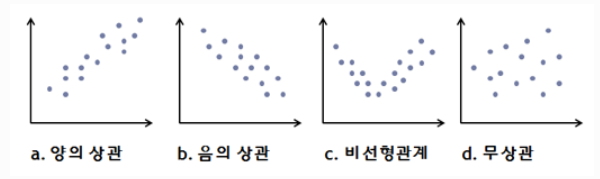

* 상관분석이 부적합한 경우

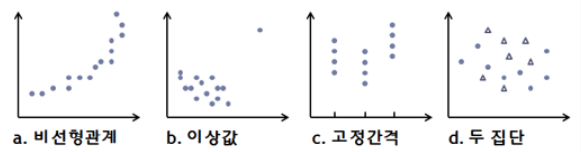

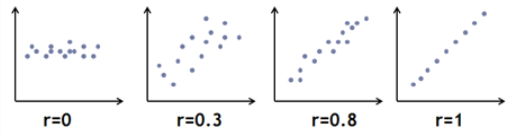

## 상관계수

* 공분산 (covariance)
\begin{equation}
Cov(X,Y) = \frac{\sum{(X-\bar{X})(Y-\bar{Y})}}{n}
\end{equation}

* 상관계수 (correlation coefficient)
\begin{equation}
Corr(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}
\end{equation}

* 해석 (부호)
    * r>0 : 양의 상관관계 (positive correlation)
    * r<0 : 음의 상관관계 (negative correlation)
    * r=0 : 무상관 (no correlation)
* 해석 (크기)
    * |r| ≤ 0.2       : 매우 약한 상관관계 (very week)
    * 0.2 ≤ |r| ≤ 0.4 : 약한 상관관계 (week)
    * 0.4 ≤ |r| ≤ 0.6 : 중간 정도의 상관관계 (moderate)
    * 0.6 ≤ |r| ≤ 0.8 : 강한 상관관계 (strong)
    * 0.8 ≤ |r| ≤ 1   : 매우 강한 상관관계 (very strong)

* 상관계수 계산
    * `np.corrcoef(x, y)` : Pearson's correlation coefficient 계산
    * `pd.Series.corr(y, method="pearson")`
        * `method` : "pearson", "spearman", "kendall" 사용 가능
    * `scipy.stat.pearsonr(x, y)`
    * `scipy.stat.spearmanr(x, y)`
    * `scipy.stat.kendalltau(x, y)`
        * 상관계수 및 검정 진행
        * H0: rho=0 vs. H1: rho != 0

## 산점도

* birth 데이터를 이용하여 신생아의 재태주수(gestwks)와 출생체중(bweight)에 대하여 상관분석을 수행하시오 [데이터명: birth.xlsx]

In [ ]:
## 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
# birth.xlsx 데이터 읽어오기
dpath = "/content/drive/MyDrive/data/"

import pandas as pd

df = pd.read_excel(dpath + "birth.xlsx")
df['hyp'] = df['hyp'].replace({0:'N', 1:'Y'})
df['sex'] = df['sex'].replace({1:'male', 2:'female'})
df.head()

,id,bweight,lowbw,gestwks,preterm,matage,hyp,sex,time_longi,obs_longi
0,448,3122,0,40.779999,0.0,23,N,female,1,1
1,338,2736,0,36.240002,1.0,24,Y,female,1,2
2,81,3341,0,38.580002,0.0,25,N,female,1,3
3,164,3261,0,37.630001,0.0,25,Y,male,1,4
4,314,3376,0,40.639999,0.0,25,N,female,1,5


In [ ]:
# birth 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          500 non-null    int64  
 1   bweight     500 non-null    int64  
 2   lowbw       500 non-null    int64  
 3   gestwks     490 non-null    float64
 4   preterm     490 non-null    float64
 5   matage      500 non-null    int64  
 6   hyp         500 non-null    object 
 7   sex         500 non-null    object 
 8   time_longi  500 non-null    int64  
 9   obs_longi   500 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,id,bweight,lowbw,gestwks,preterm,matage,time_longi,obs_longi
count,500.000000,500.000000,500.000000,490.000000,490.000000,500.000000,500.000000,500.000000
mean,250.500000,3136.884000,0.120000,38.721857,0.128571,34.028000,13.000000,10.500000
std,144.481833,637.451485,0.325287,2.314167,0.335067,3.897897,7.218324,5.772056
min,1.000000,628.000000,0.000000,24.690001,0.000000,23.000000,1.000000,1.000000
25%,125.750000,2862.000000,0.000000,37.939999,0.000000,31.000000,7.000000,5.750000
50%,250.500000,3188.500000,0.000000,39.125000,0.000000,34.000000,13.000000,10.500000
75%,375.250000,3551.250000,0.000000,40.090000,0.000000,37.000000,19.000000,15.250000
max,500.000000,4553.000000,1.000000,43.160000,1.000000,43.000000,25.000000,20.000000


ShapiroResult(statistic=0.9452608046470256, pvalue=1.2559382726692431e-12)
ShapiroResult(statistic=nan, pvalue=nan)


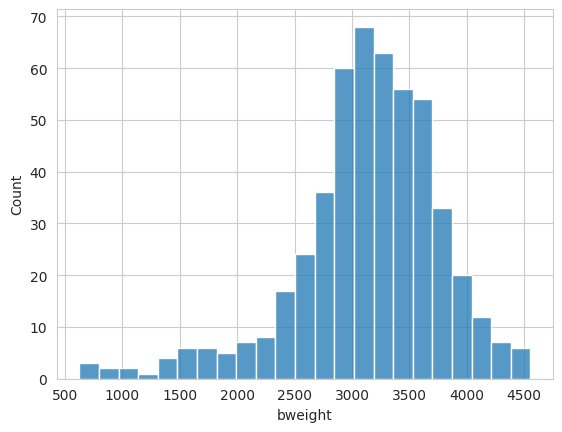

In [ ]:
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(df.bweight))
print(shapiro(df.gestwks))

import seaborn as sns
sns.set_style("whitegrid");
sns.histplot(df["bweight"]);

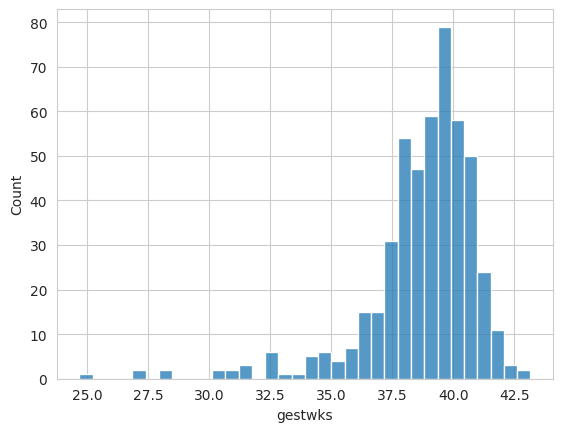

In [ ]:
sns.histplot(df["gestwks"]);

In [ ]:
# 결측 제거
x = df[["bweight", "gestwks"]].dropna().bweight
y = df[["bweight", "gestwks"]].dropna().gestwks

In [ ]:
# numpy 이용
np.corrcoef(x, y)

array([[1.        , 0.71221619],
       [0.71221619, 1.        ]])

In [ ]:
# pandas 이용
print(x.corr(y, method="pearson"))
print(x.corr(y, method="spearman"))
print(x.corr(y, method="kendall"))

0.7122161878327874
0.5473960417635215
0.38972648170499424


In [ ]:
# scipy.stats 이용
from scipy.stats import pearsonr, spearmanr, kendalltau

print(pearsonr(x, y))
print(spearmanr(x, y))
print(kendalltau(x, y))

PearsonRResult(statistic=0.7122161878327877, pvalue=5.064414896174257e-77)
SignificanceResult(statistic=0.5473960417635215, pvalue=1.1890409322397326e-39)
SignificanceResult(statistic=0.38972648170499424, pvalue=5.865380909711858e-38)


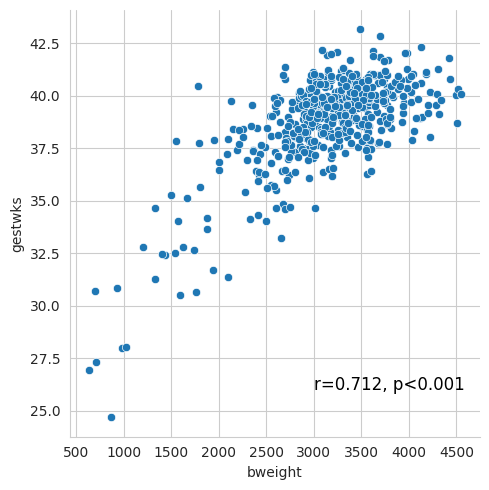

In [ ]:
# 산점도
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x="bweight", y="gestwks", data=df)

r, p = pearsonr(x, y)
plt.text(x=3000, y=26, s="r=" + str(r.round(3)) + ", p<0.001", fontdict=dict(color="k", size=12));

* 결과 정리

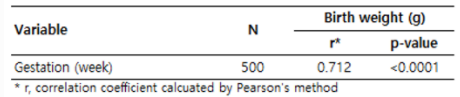

# 단순선형회귀분석

* 회귀분석
    * 유전학자 F. Galton이 아버지와 아들의 신장(height)간에 어떠한 연관성이 있는지를 알아보는 연구에서 이 두 변수간의 관계를 선형모형으로 적합하여 아들의 신장이 평균값으로 회귀(regress)되는 현상을 발견한 것에서부터 유래

    * 특정한 현상과 그 현상에 영향을 미칠 수 있는 변수들 간의 함수관계를 표현할 수 있는 모형을 이론적 근거나 경험적 판단에 의하여 설정하고 관측된 자료로부터 함수관계를 추정하고 예측하는 통계적인 분석방법

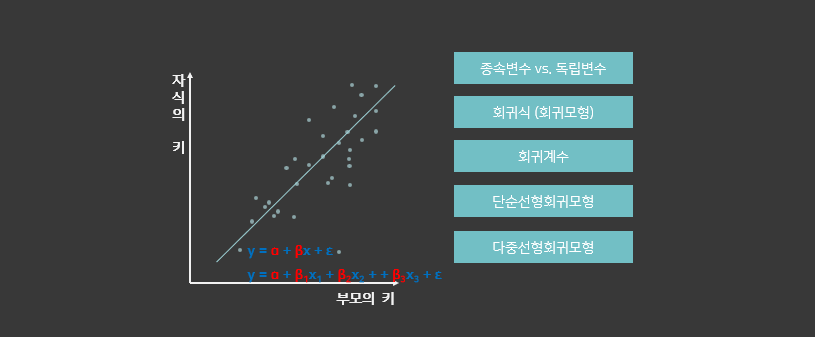

* 단순선형회귀분석

    * 목적 : 연속형 종속변수(y)에 대한 독립변수(x)의 영향력을 선형 회귀식으로 추정
    * 가정
        * 선형성 (y와 x가 선형관계에 있음)
        * 오차항의 정규성 (오차가 정규분포를 따름)
        * 오차항의 독립성 (오차들이 서로 영향을 받지 않고 독립적)
        * 오차항의 등분산성 (모든 독립변수의 값에서 오차의 분산은 동일할 것)
    * 회귀식
    \begin{equation}
    y = α + βx + ε
    \end{equation}

       * $\alpha$ (intercept, 절편) : x=0일 때 y값들의 평균
        * $\beta$ (slope, 기울기) : x가 1단위 증가할 때 y의 평균적인 증가량 / 회귀계수 (regression coefficient)
      * 회귀모형 (regression model)이라고 부르기도 함
     * 주로 최소제곱법(Least square method)에 의해 추정됨 (오차항의 제곱합이 최소가 되는 직선)
    * 오차항(error term, ε)과 잔차 (residual)
        * 오차항 : 회귀식에서 x에 의해 설명되지 않는 남은 변동
        * 잔차 : 실제 관측값과 회귀선에 의한 예측값 사이의 차이 / 오차항의 추정치
        * 가정 확인 시, 오차항의 추정치인 잔차를 이용
        

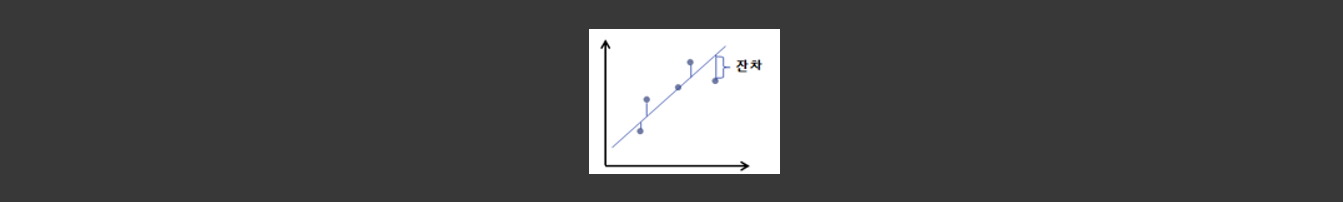

## 단순선형회귀분석의 절차


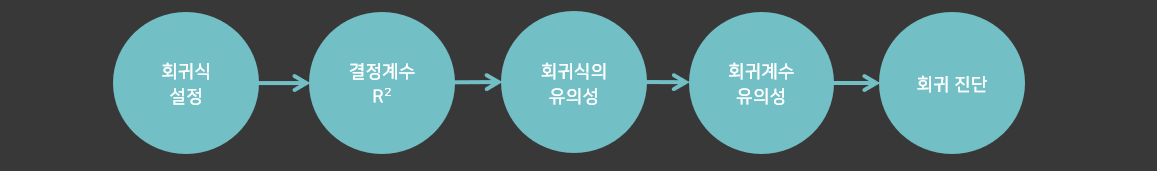

1. 결정계수 $R^{2}$

* 추정된 회귀식의 설명력
* 회귀식 전체가 설명하는 종속변수 y의 변동 비율
* 단순 선형회귀분석에서의 결정계수는 Pearson’s correlation (r) 의 제곱과 동일
* $ 0 ≤ R^{2} ≤ 1$ (1에 가까울수록 설명력이 높은 것)
* 보통 0.7이상이면 회귀모형의 적합도가 높다고 판단

<br>

2. 회귀식의 유의성

* 회귀식의 설명비율이 오차에 의한 비율보다 높은가를 검정
* 즉, 회귀식이 통계적으로 의미있는가를 확인 (회귀식에 의한 추정이 단순 평균 추정보다 더 정확하다는 의미)
* 회귀분석 후 분산분석 표(F-test)를 통해 확인
    * 귀무가설 : 회귀식(y = α + βx)으로 y의 변동량을 설명할 수 없다
    * 대립가설 : 회귀식(y = α + βx)으로 y의 변동량을 설명할 수 있다
    * p<0.05이면 추정된 회귀식이 통계적으로 유의하다고 판단

<br>

3. 회귀계수($\beta$)의 유의성

* 종속변수 y 와 독립변수 x가 관련이 있는지 나타냄 (회귀계수를 제시할 때 95% 신뢰구간도 함께 제시)
* 단순 회귀분석에서는 회귀식의 유의성 검정과 회귀계수의 유의성 검정이 실제로 같은 결과 보여줌
* 다중 회귀분석에서는 회귀식의 유의성 검정 후, 각 독립변수 별로 회귀계수의 유의성을 개별 검정
    * 귀무가설 : $\beta = 0$ (x는 y와 관계가 없다)
    * 대립가설 : $\beta \neq 0$ (x는 y와 관계가 있다)
    * p<0.05이면 추정된 회귀계수가 통계적으로 유의하다고 판단


<br>



4. 회귀진단

* 추정된 회귀식이 기본 가정을 만족하는지 확인하는 절차
* 오차항에 대한 가정은 오차항의 추정치인 잔차를 통해 검정

    1. 선형성 : 산점도로 확인
    2. 오차항의 정규성 : 잔차의 정규 P-P도표로 확인 (점들이 직선에 가까우면 정규성을 따른다고 판단)
    3. 오차항의 독립성 : 잔차 산점도 및 Durbin-Watson 통계량으로 확인 (DW가 2 안팎이면 이웃하는 잔차간에 상관성이 없다고 판단 / 0이나 4에 가까우면 독립성 위배)
    4. 오차항의 등분산성 : 잔차 산점도로 확인 (규칙 없이 퍼져 있으면 독립성과 등분산성 만족한다고 판단)

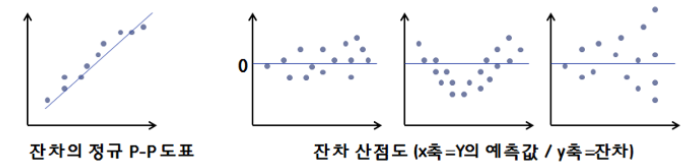

* 회귀진단에 이용되는 통계량

Term | Details
:--- | :---
fitted value | (추정된 회귀식에 기초하여) 해당 요인에 대해 예측된 종속변수 값
residual | (추정된 회귀식에 기초한) 적합값과 실제 관측값의 차이
Studentized residual | 잔차를 표준편차로 나눈 표준화한 값/절대값이 2보다 큰 경우 이상값 의심
excluded studentized residual | 해당 값 제외 후 계산한 표준화 잔차 / 절대값이 2보다 큰 경우 이상값 의심
outlier | (다른 관측값들이 모형을 잘 따르는 반면) 모형을 잘 따르지 않는 관측값
 | 독립변수에서의 이상치 : 다른 독립변수들의 모임에서 벗어난 독립변수 값. 레버리지값으로 판단
 | 종속변수에서의 이상치 : 추정된 회귀식으로부터 떨어진 종속변수값. 표준화잔차값으로 판단
leverage point | (독립변수의) 평균으로부터 멀리 떨어진 관측값. 회귀계수의 추정에 큰 영향을 줄 수 있음 (Hat행렬의 대각원소)
influential point | 회귀식에 크게 영향을 미치는 관측값. 이 값이 제거되면 회귀계수 추정값이 크게 변함. 영향점은 <u>지렛점과 이상치의 산물</u>로 생각될 수 있음
Cook’s distance | 해당 관측값이 제외될 때 회귀식이 얼마나 크게 변하는지 측정 (모형에 대한 전반적인 영향도)
 | 관측값의 leverage와 residual의 정보를 동시에 고려한 척도
 | 1보다 크면 영향점 의심

## 모형 적합 1 (상수항 생성)

* `statsmodels.api`

* `sm.add_constant(x, has_constant="skip")`
    * `has_constant="skip"`  : 데이터에 상수항이 있을 경우 미추가 (default)
    * `has_constatn="raise"` : 데이터에 상수항이 있을 경우 에러 출력
    * `has_constatn="add"` : 데이터에 상수항이 있을 경우 상수항을 중복 생성

* `sm.OLS(endog, exog=None)` : 회귀식 설정
    * `endog` : endogenous variable (종속변수)
    * `exog` : exogenous variable (독립변수)

* `sm.OLS.fit()` : 회귀식 적합
    * `.summary()` : 결과 출력
    * `.rsquare`   : 결정계수 출력
    * `.f_pvalue`  : 회귀식의 유의확률
    * `.params`    : 회귀계수 출력
    * `.pvalues`   : 회귀계수의 유의확률
    * `.resid`     : 회귀잔차
    * `.predict()` : 예측값 $\hat{y}$ 계산
    



* 허리둘레와 복부지방양의 연구 데이터를 이용하여 CT로부터 얻은 복부지방양을 허리둘레를 이용하여 예측할 수 있는 회귀모형에 대한 분석을 수행하시오. [데이터명 : fat.xlsx]

In [ ]:
df = pd.read_excel(dpath + "fat.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   obs     107 non-null    int64
 1   fat     107 non-null    int64
 2   waist   107 non-null    int64
dtypes: int64(3)
memory usage: 2.6 KB


In [ ]:
df.head()

,obs,fat,waist
0,1,75,26
1,2,73,26
2,3,82,43
3,4,84,43
4,5,75,30


In [ ]:
df.describe()

,obs,fat,waist
count,107.000000,107.000000,107.000000
mean,54.000000,91.495327,101.962617
std,31.032241,13.107951,57.827970
min,1.000000,64.000000,11.000000
25%,27.500000,80.000000,51.000000
50%,54.000000,90.000000,97.000000
75%,80.500000,104.000000,137.000000
max,107.000000,121.000000,253.000000


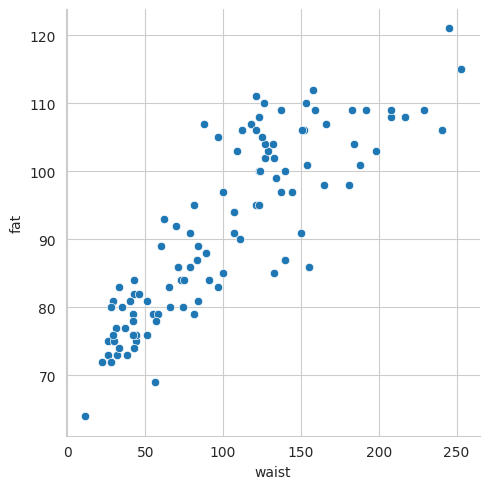

In [ ]:
# 상관관계 체크
import seaborn as sns
sns.relplot(x="waist", y="fat", data=df);

In [ ]:
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(df.waist))
print(shapiro(df.fat))

ShapiroResult(statistic=0.9507449077663932, pvalue=0.0005779444396383485)
ShapiroResult(statistic=0.9504326377953555, pvalue=0.0005499952374443432)


In [ ]:
# 상관계수
from scipy.stats import spearmanr
spearmanr(df.waist, df.fat)

SignificanceResult(statistic=0.8689855953640149, pvalue=7.388476427128456e-34)

<class 'pandas.core.frame.DataFrame'>
   const  waist
0    1.0     26
1    1.0     26
2    1.0     43
3    1.0     43
4    1.0     30
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.6897      1.335     53.702      0.000      69.043      74.337
waist          0.1942      0.011     17.037      0.000       0.172       0.217


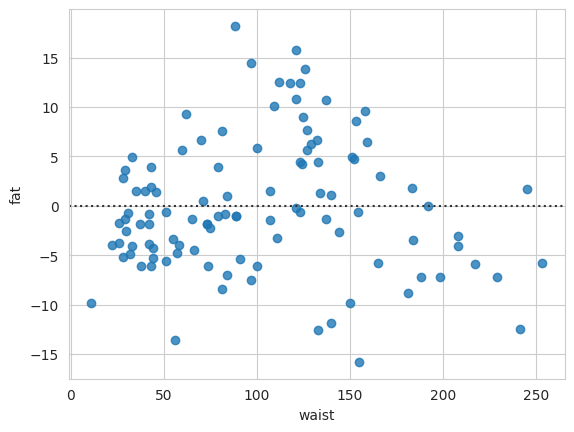

In [ ]:
# 단순선형회귀분석
import statsmodels.api as sm

# 1. 상수항 추가
waist1 = sm.add_constant(df.waist, has_constant="add")
print(type(waist1))
print(waist1.head())

# 2. 회귀식 설정
model = sm.OLS(df.fat, waist1)

# 3. 모형 적합
fitted = model.fit()

# 4. 결과 확인
fitted.summary()
fitted.summary().tables[0]
fitted.summary().tables[1]
fitted.summary().tables[2]

# 1) 결정계수
dir(fitted)
fitted.rsquared.round(2)

# 2) 회귀식의 유의성
fitted.f_pvalue.round(3)

# 3) 회귀계수의 유의성
print(fitted.summary().tables[1])
fitted.params
fitted.pvalues

# 4) 회귀진단
fitted.resid

import seaborn as sns
sns.residplot(x=df.waist, y=df.fat);

In [ ]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fat   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     290.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           5.40e-32
Time:                        04:06:24   Log-Likelihood:                -355.74
No. Observations:                 107   AIC:                             715.5
Df Residuals:                     105   BIC:                             720.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.6897      1.335     53.702      0.000      69.043      74.337
waist          0.1942      0.011     17.037      0.000       0.172       0.217
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.181
Skew:                           0.347   Prob(JB):                        0.336
Kurtosis:                       2.907   Cond. No.                         238.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
dir(OLSInfluence(fitted))
res = OLSInfluence(fitted)
print(res.resid_std)  # Standardized residual
print(res.resid_studentized)  # Studentized residual
res.summary_frame()
res.summary_table()
    # fitted value (적합값)
    # Cook's distance (영향점과 지렛점을 동시고려 / 1보다 크면 영향점 의심)
    # studentized residual (스튜던트화 잔차)
    # hat diag (햇행렬의 대각원소 = 레버리지)
    # diffits internal

[6.70060843 6.70060843 6.72282101 6.72282101 6.70634553 6.69455574
 6.7049408  6.71044174 6.67627639 6.70909599 6.70351638 6.72395136
 6.71687615 6.72167114 6.70773059 6.73599559 6.72395136 6.71044174
 6.72282101 6.7049408  6.71562847 6.71931276 6.71307434 6.73938835
 6.72615349 6.74651414 6.75288917 6.75324456 6.75127485 6.74319316
 6.74827479 6.7547326  6.75127485 6.75324456 6.75031601 6.75286182
 6.75610513 6.74931312 6.74882304 6.73509888 6.74827479 6.73131774
 6.73131774 6.74241615 6.75611232 6.75387453 6.75610513 6.75209033
 6.74389604 6.75212056 6.75556349 6.75519302 6.74707568 6.72167114
 6.72167114 6.73773077 6.7547326  6.72923392 6.74712034 6.749352
 6.73687288 6.75631219 6.70351638 6.75209033 6.73932778 6.75286182
 6.75611232 6.71678354 6.75447351 6.73024875 6.75631219 6.75209033
 6.62781852 6.74241615 6.7558728  6.75031601 6.75537996 6.67790656
 6.74766401 6.75078852 6.7312441  6.72607257 6.69287553 6.69129168
 6.75286182 6.7249798  6.55657197 6.74452913 6.7180131  6.732220

obs,endog,fitted,Cook's,student.,hat diag,dffits,ext.stud.,dffits
,,value,d,residual,,internal,residual,
0.0,75.0,76.74005502143926,0.0008867380952217514,-0.25968612232315874,0.025624433011935576,-0.042112660690622514,-0.2585295977789128,-0.04192510994560582
1.0,73.0,76.74005502143926,0.004096617227863855,-0.5581664796952645,0.025624433011935517,-0.09051648720386639,-0.5563281505573461,-0.0902183698823466
2.0,82.0,80.04220068039619,0.0008280424675069765,0.29121693352052813,0.019153597686256293,0.040695023467421085,0.2899439844994381,0.04051713995748969
3.0,84.0,80.04220068039619,0.0033839489555033283,0.5887110950564107,0.019153597686256293,0.0822672347353833,0.5868703645338373,0.08201000871865498
4.0,75.0,77.51703047060559,0.0017286413398833968,-0.3753207253551466,0.02395518640236857,-0.05879866222769693,-0.3737800196817907,-0.058557291510973976
5.0,72.0,75.96307957227292,0.004933405392412224,-0.5919854469787436,0.027383954772992776,-0.09933182161233352,-0.5901453789185223,-0.09902306856232988
6.0,81.0,77.322786608314,0.003755598732684665,0.5484333867537987,0.02436403475930808,0.08666716486287833,0.5465989966036934,0.08637728208513017
7.0,83.0,78.09976205748035,0.006210432544087494,0.7302407399606345,0.022762494513358916,0.11144893489026705,0.7286075872613196,0.1111996840351838
8.0,64.0,73.8263970870655,0.036602727045299814,-1.4718379698562594,0.03268812086577243,-0.2705650644310895,-1.48016099596759,-0.27209506986796095


In [ ]:
## 예측
## yhat 직접 구하기 회귀계수 X 데이터
print(np.dot(waist1, fitted.params))

## predict() 이용
print(fitted.predict(waist1))

sum(fitted.predict(waist1) - np.dot(waist1, fitted.params))

[ 76.74005502  76.74005502  80.04220068  80.04220068  77.51703047
  75.96307957  77.32278661  78.09976206  73.82639709  77.9055182
  77.12854275  80.23644454  79.07098137  79.84795682  77.71127433
  82.56737089  80.23644454  78.09976206  80.04220068  77.32278661
  78.87673751  79.45946909  78.48824978  83.34434634  80.62493227
  85.28678496  87.81195517  88.00619903  87.03497972  84.31556565
  85.86951655  88.97741835  87.03497972  88.00619903  96.35868511
  95.19322194  92.47380787  96.74717284  86.06376041  82.37312703
  85.86951655  81.59615158  81.59615158  98.88385532  90.53136924
  94.61049035  92.47380787  95.58170966  84.50980951  87.42346745
  93.25078332  89.36590607  97.52414829  79.84795682  79.84795682
  82.95585861  88.97741835 101.79751326  85.48102882  86.25800427
  82.76161475  91.11410083  77.12854275  95.58170966  99.66083077
  95.19322194  90.53136924 103.93419574  88.78317448 101.60326939
  91.11410083  95.58170966 113.84063272  98.88385532  92.86229559
  96.358685

0.0

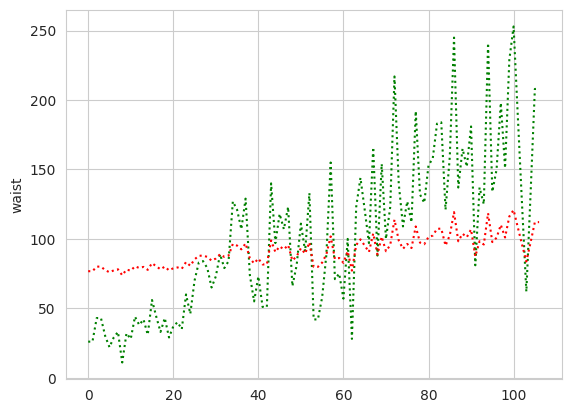

In [ ]:
# 실측값 vs 예측값 시각화
import seaborn as sns
sns.lineplot(df.waist, color="g", linestyle=":");
sns.lineplot(fitted.predict(waist1), color="r", linestyle=":");

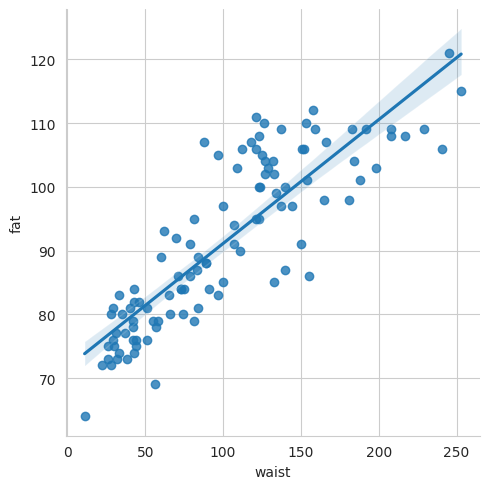

In [ ]:
# 회귀직선 시각화
sns.lmplot(x="waist", y="fat", data=df);

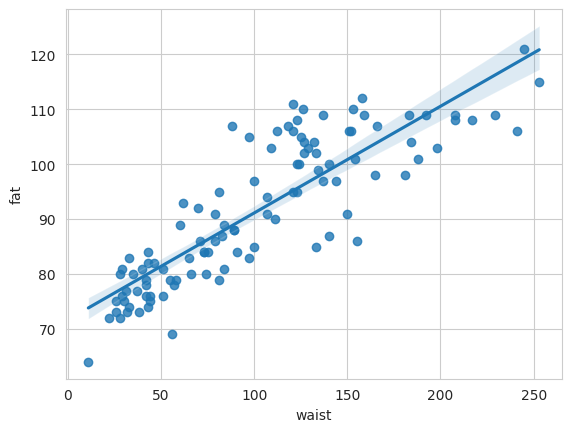

In [ ]:
sns.regplot(x="waist", y="fat", data=df);

## 모형 적합 2 (회귀식)


In [ ]:
import statsmodels.api as sm

# 회귀식 설정
model = sm.OLS.from_formula("fat ~ waist", data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fat   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     290.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           5.40e-32
Time:                        04:11:53   Log-Likelihood:                -355.74
No. Observations:                 107   AIC:                             715.5
Df Residuals:                     105   BIC:                             720.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.6897      1.335     53.702      0.000      69.043      74.337
waist          0.1942      0.011     17.037      0.000       0.172       0.217
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.181
Skew:                           0.347   Prob(JB):                        0.336
Kurtosis:                       2.907   Cond. No.                         238.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 모형 적합 3 (회귀식)

In [ ]:
## 회귀식 적합 2
from statsmodels.formula.api import ols
model = ols("fat ~ waist", data=df)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     290.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           5.40e-32
Time:                        04:12:42   Log-Likelihood:                -355.74
No. Observations:                 107   AIC:                             715.5
Df Residuals:                     105   BIC:                             720.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.6897      1.335     53.702      0.0

* 결과 정리


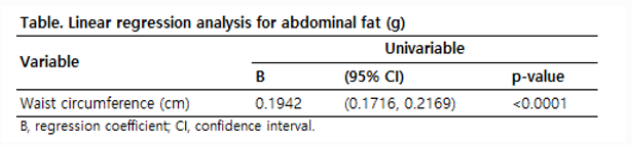

## 범주형변수 처리



* 산모의 임신기간, 산모의 흡연상태가 태아의 출생 시 몸무게에 어떠한 영향을 미치는지 조사할 때, 산모의 흡연여부에 대한 해석

\begin{equation}
E(Y) = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} \\
E(Y) = \beta_{0} + \beta_{1}x_{1} (비흡연자) \\
E(Y) = \beta_{0} + \beta_{1}x_{1} + \beta_{2} (흡연자)
\end{equation}



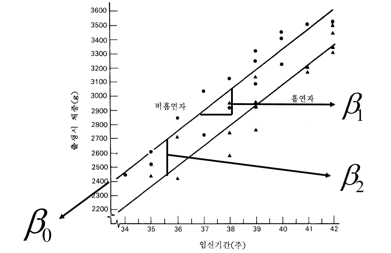

In [ ]:
# 더미변수 생성
example = pd.DataFrame({"code": [0, 1, 2, 3], "level":["정상", "경미", "중상", "심각"]})
example

,code,level
0,0,정상
1,1,경미
2,2,중상
3,3,심각


In [ ]:
pd.get_dummies(example)

,code,level_경미,level_심각,level_정상,level_중상
0,0,False,False,True,False
1,1,True,False,False,False
2,2,False,False,False,True
3,3,False,True,False,False


In [ ]:
pd.get_dummies(example, columns=["code"])

,level,code_0,code_1,code_2,code_3
0,정상,True,False,False,False
1,경미,False,True,False,False
2,중상,False,False,True,False
3,심각,False,False,False,True


In [ ]:
pd.get_dummies(example, columns=["code"], drop_first=True)

,level,code_1,code_2,code_3
0,정상,False,False,False
1,경미,True,False,False
2,중상,False,True,False
3,심각,False,False,True


* 신생아체중 데이터(birth.xlsx)에서 산모의 고혈압 여부(hyp)에 따른 신생아의 출생체중(bweight)에 대해 회귀분석을 진행하시오.


In [ ]:
import pandas as pd
df = pd.read_excel(dpath + "birth.xlsx")
df['hyp'] = df['hyp'].replace({0:'n', 1:'y'})
df['sex'] = df['sex'].replace({1:'male', 2:'female'})
df.head()

,id,bweight,lowbw,gestwks,preterm,matage,hyp,sex,time_longi,obs_longi
0,448,3122,0,40.779999,0.0,23,n,female,1,1
1,338,2736,0,36.240002,1.0,24,y,female,1,2
2,81,3341,0,38.580002,0.0,25,n,female,1,3
3,164,3261,0,37.630001,0.0,25,y,male,1,4
4,314,3376,0,40.639999,0.0,25,n,female,1,5


In [ ]:
# 산모의 고혈압 여부를 더미변수로 변경
df2 = pd.get_dummies(df, columns=["hyp"], drop_first=True)
df2.head()

,id,bweight,lowbw,gestwks,preterm,matage,sex,time_longi,obs_longi,hyp_y
0,448,3122,0,40.779999,0.0,23,female,1,1,False
1,338,2736,0,36.240002,1.0,24,female,1,2,True
2,81,3341,0,38.580002,0.0,25,female,1,3,False
3,164,3261,0,37.630001,0.0,25,male,1,4,True
4,314,3376,0,40.639999,0.0,25,female,1,5,False


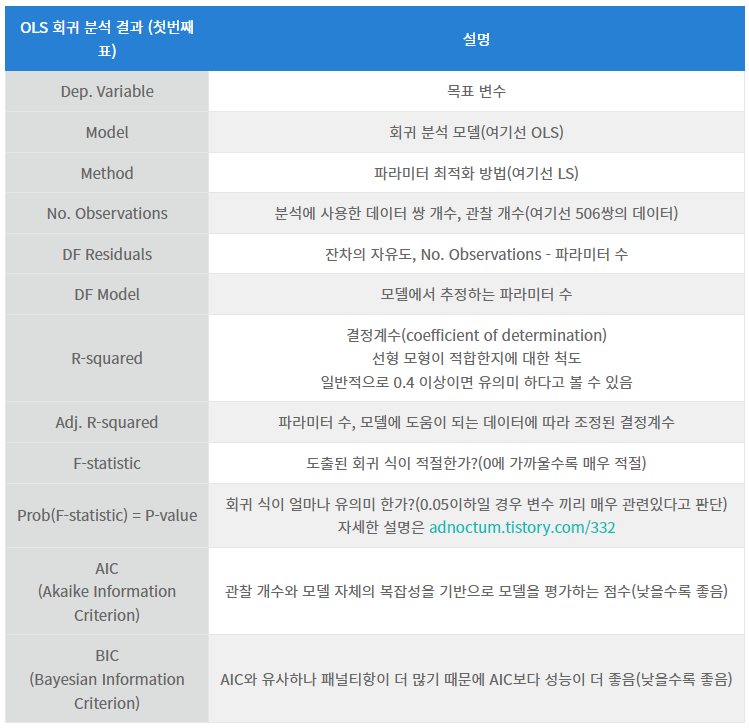

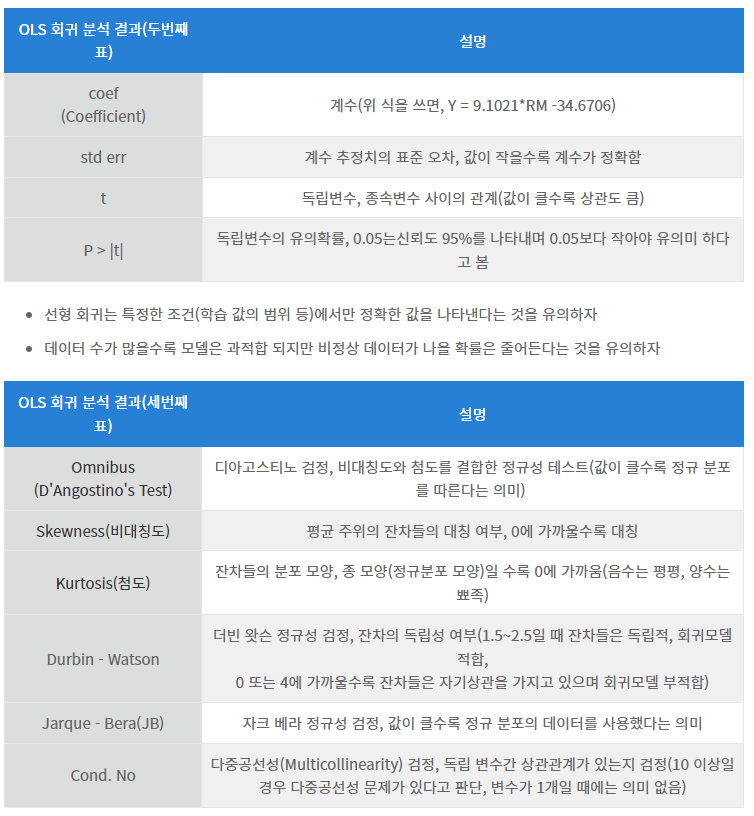

In [ ]:
# 회귀식 적합

# 1. OLS 이용
import statsmodels.api as sm
hyp1 = sm.add_constant(df2.hyp_y, has_constant="add")
model = sm.OLS(df2.bweight, hyp1.astype('float'))
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                bweight   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     29.76
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           7.73e-08
Time:                        04:21:15   Log-Likelihood:                -3923.2
No. Observations:                 500   AIC:                             7850.
Df Residuals:                     498   BIC:                             7859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3198.9042     29.961    106.768      0.0

In [ ]:
# 2. OLS.from_formula() 이용
import statsmodels.api as sm
model = sm.OLS.from_formula("bweight ~ hyp_y", data=df2)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                bweight   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     29.76
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           7.73e-08
Time:                        04:19:53   Log-Likelihood:                -3923.2
No. Observations:                 500   AIC:                             7850.
Df Residuals:                     498   BIC:                             7859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3198.9042     29.961    106.768

In [ ]:
# 3. ols() 이용
from statsmodels.formula.api import ols
model = ols("bweight ~ hyp_y", data=df2)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                bweight   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     29.76
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           7.73e-08
Time:                        04:25:37   Log-Likelihood:                -3923.2
No. Observations:                 500   AIC:                             7850.
Df Residuals:                     498   BIC:                             7859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3198.9042     29.961    106.768

* 결과 정리

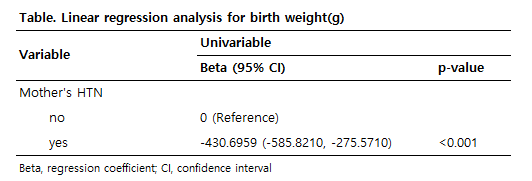

# 다중선형회귀분석

## 다중선형회귀분석의 절차

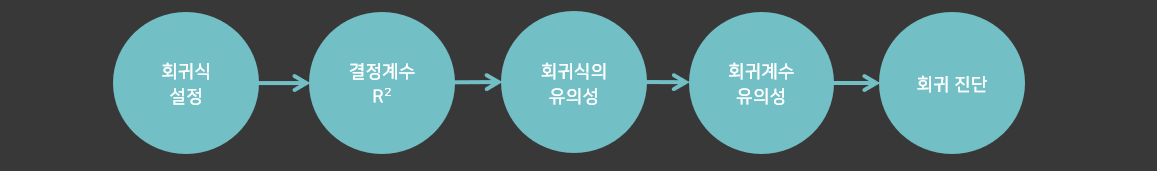



* 수정된 결정계수 (adjusted $R^{2}$)
    * 회귀식 전체가 설명하는 종속변수 y의 변동 비율 계산 시, 독립변수의 수를 고려
    * 새로 추가된 독립변수의 설명력이 미미한 경우, R2 은 조금 증가할 수 있으나, adj.$R^{2}$은 오히려 감소
    * 0~1 사이 값을 가짐. 1에 가까울수록 설명력이 높은 것.
    * 보통 0.7이상이면 회귀모형의 적합도가 높다고 판단

<br>

* 회귀식의 유의성
    * Simple linear regression과 동일하게 회귀분석 후 분산분석 표를 통해 확인
    * p<0.05이면 추정된 회귀식이 통계적으로 유의하다고 판단




* 나이와 치료 방법에 따른 수술의 효과를 검정하고자 한다. 36명의 데이터를 활용하여 다중회귀분석을 수행하라. [데이터명 : op.xlsx]

In [ ]:
## 데이터 불러오기
import pandas as pd
df = pd.read_excel(dpath + "op.xlsx")
df.head()

,Y,age,treatment
0,56,21,A
1,55,28,A
2,63,33,A
3,52,33,A
4,58,38,A


In [ ]:
## 단순선형회귀분석 - age 모형 적합 1
import statsmodels.api as sm
age1 = sm.add_constant(df["age"], has_constant="add")
model1 = sm.OLS(df.Y, age1)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     59.08
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           6.15e-09
Time:                        04:28:34   Log-Likelihood:                -123.13
No. Observations:                  36   AIC:                             250.3
Df Residuals:                      34   BIC:                             253.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3393      4.083      6.207      0.0

In [ ]:
## 단순선형회귀분석 - treatment 모형 적합 2
## 빈도 확인
df.treatment.value_counts()

,count
treatment,
A,12
B,12
C,12


In [ ]:
# 더미변수화
df2 = pd.get_dummies(df, columns=["treatment"], drop_first=True)
df2.head()

,Y,age,treatment_B,treatment_C
0,56,21,False,False
1,55,28,False,False
2,63,33,False,False
3,52,33,False,False
4,58,38,False,False


In [ ]:
import statsmodels.api as sm
model2 = sm.OLS.from_formula("Y ~ treatment_B + treatment_C", data=df2)
fitted2 = model2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3.424
Date:                Fri, 29 Nov 2024   Prob (F-statistic):             0.0445
Time:                        04:30:14   Log-Likelihood:                -137.86
No. Observations:                  36   AIC:                             281.7
Df Residuals:                      33   BIC:                             286.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              62.3333    

In [ ]:
## 다중선형회귀분석 - age, treatment 동시에 모형 적합 3
from statsmodels.formula.api import ols
model3 = ols("Y ~ age + treatment_B + treatment_C", data=df2)
fitted3 = model3.fit()
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     38.71
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           9.29e-11
Time:                        04:32:17   Log-Likelihood:                -113.68
No. Observations:                  36   AIC:                             235.4
Df Residuals:                      32   BIC:                             241.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              32.5433    

In [ ]:
# 3개 모델 비교
print("설명력: %.3f, %.3f, %.3f" % (fitted1.rsquared, fitted2.rsquared, fitted3.rsquared))

설명력: 0.635, 0.172, 0.784


## 다중공선성

* multicollinearity
* 독립변수들이 너무 밀접한 관련이 있어서 각각의 영향을 보정하여 분석하기 어려운 상태
* 다중 공선성이 있을 경우 추정치의 분산이 증가하여 회귀계수들의 신뢰도 감소
* 분산팽창요인 (Variance inflation factor, $VIF=1/(1−R^{2})$)
* 이 변수에 의해 회귀계수의 분산이 팽창된 정도
* 10 이상이면 다중공선성 있다고 판단
* 의미가 더 중요하거나, 종속변수와의 관련성이 더 높은 변수를 선택 (두 변수의 결합변수를 만들기도 함)



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dir(model3)
print(model3.exog_names)
print(model3.endog_names)

['Intercept', 'treatment_B[T.True]', 'treatment_C[T.True]', 'age']
Y


In [ ]:
for i in range(1,4):
    print(model3.exog_names[i] + ": " + str(variance_inflation_factor(model3.exog, i).round(3)))

treatment_B[T.True]: 1.334
treatment_C[T.True]: 1.335
age: 1.001


## 범주형 변수와 연속형 변수의 교호작용

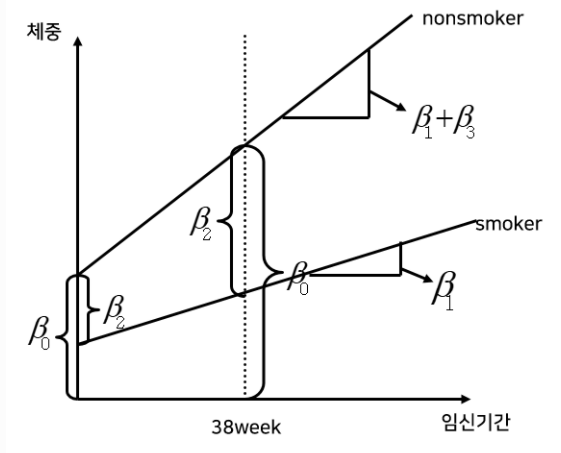



* 모형:
$$ E(Y)=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2} + \beta_{3}x_{1}x_{2}$$
* 흡연자의 모형($x_{2}=0$):
$$ E(Y)=\beta_{0}+\beta_{1}x_{1} $$
* 비흡연자의 모형($x_{2}=1$):
$$ E(Y)=β0+β1x1+β2+β3x1=(β0+β2)+(β1+β3)x1 $$

In [ ]:
# 연령과 수술 방법 간의 교호작용 확인 (모형 적합 3)
from statsmodels.formula.api import ols
model4 = ols("Y ~ age + treatment_B + treatment_C + age*treatment_B + age*treatment_C", data=df2)
fitted4 = model4.fit()
print(fitted4.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     64.04
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           4.26e-15
Time:                        04:37:33   Log-Likelihood:                -97.024
No. Observations:                  36   AIC:                             206.0
Df Residuals:                      30   BIC:                             215.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     38.71
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           9.29e-11
Time:                        04:38:46   Log-Likelihood:                -113.68
No. Observations:                  36   AIC:                             235.4
Df Residuals:                      32   BIC:                             241.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              32.5433    

In [ ]:
# 교호작용을 제외한 모형과 비교
fitted4.compare_lr_test(restricted=fitted3)

(33.30305780139582, 5.8658760685626444e-08, 2.0)

* 결과 정리

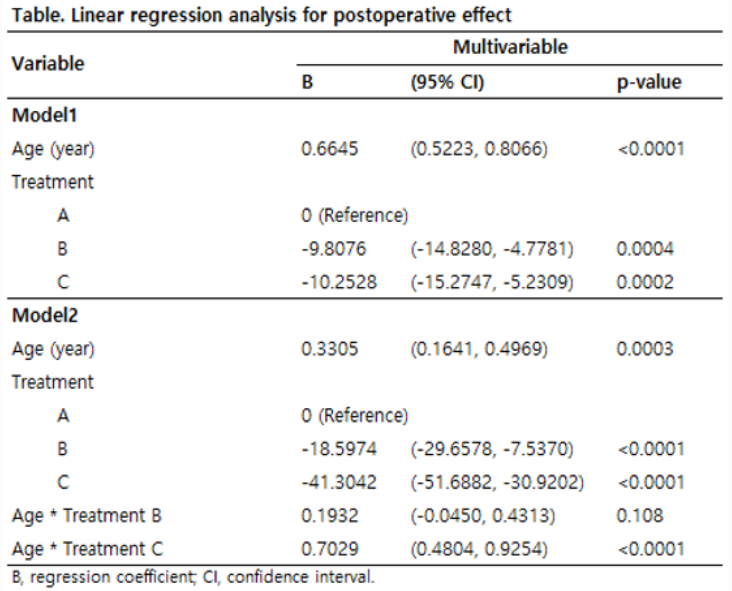



## 변수선택법

* Forward selection: 회귀계수의 유의확률이 가장 낮은 변수부터 모형에 넣고 남은 변수 중 모형에 추가하였을 때 유의확률이 가장 낮은 변수를 순서대로 더해 나감
* Backward selectinon: 모든 변수를 회귀식에 넣은 상태에서 유의확률이 가장 높은 변수부터 제거
* Stepwise selection: 독립변수의 유의확률을 계속적으로 평가하면서 입력, 제거를 반복





* birth data에서 아이의 성별(sex), 재태주수(gestwks), 산모의 나이(matage), 산모의 고혈압여부(hyp)가 출생체중(bweight)과 어떤 관련을 보이는지 최적의 선형회귀모형을 적합하시오.

In [ ]:
# 데이터 호출
df = pd.read_excel(dpath + "birth.xlsx")
df['hyp'] = df['hyp'].replace({0:'n', 1:'y'})
df.head()

,id,bweight,lowbw,gestwks,preterm,matage,hyp,sex,time_longi,obs_longi
0,448,3122,0,40.779999,0.0,23,n,2,1,1
1,338,2736,0,36.240002,1.0,24,y,2,1,2
2,81,3341,0,38.580002,0.0,25,n,2,1,3
3,164,3261,0,37.630001,0.0,25,y,1,1,4
4,314,3376,0,40.639999,0.0,25,n,2,1,5


In [ ]:
# 종속변수
y = df.bweight

# 독립변수
df2 = pd.get_dummies(df, columns=["hyp"], drop_first=True)
df2.head()

,id,bweight,lowbw,gestwks,preterm,matage,sex,time_longi,obs_longi,hyp_y
0,448,3122,0,40.779999,0.0,23,2,1,1,False
1,338,2736,0,36.240002,1.0,24,2,1,2,True
2,81,3341,0,38.580002,0.0,25,2,1,3,False
3,164,3261,0,37.630001,0.0,25,1,1,4,True
4,314,3376,0,40.639999,0.0,25,2,1,5,False


In [ ]:
df3 = pd.get_dummies(df2, columns=["sex"], drop_first=True)
df3.head()

,id,bweight,lowbw,gestwks,preterm,matage,time_longi,obs_longi,hyp_y,sex_2
0,448,3122,0,40.779999,0.0,23,1,1,False,True
1,338,2736,0,36.240002,1.0,24,1,2,True,True
2,81,3341,0,38.580002,0.0,25,1,3,False,True
3,164,3261,0,37.630001,0.0,25,1,4,True,False
4,314,3376,0,40.639999,0.0,25,1,5,False,True


In [ ]:
df4 = df3.copy()
df4.head()

,id,bweight,lowbw,gestwks,preterm,matage,time_longi,obs_longi,hyp_y,sex_2
0,448,3122,0,40.779999,0.0,23,1,1,False,True
1,338,2736,0,36.240002,1.0,24,1,2,True,True
2,81,3341,0,38.580002,0.0,25,1,3,False,True
3,164,3261,0,37.630001,0.0,25,1,4,True,False
4,314,3376,0,40.639999,0.0,25,1,5,False,True


In [ ]:
## 1. 모형 적합
## 2. 통계량 계산 (가장 낮은 AIC 기준)
## 3. 비교 후 선택

"bweight ~ gestwks + matage"

# 회귀식 설정
y = "bweight"
x = ["gestwks", "matage"]
" + ".join(x)
y + "~" + "+".join(x)

# 적합된 모형과 AIC를 반환하는 함수 작성
from statsmodels.formula.api import ols
model = ols(y + "~" + "+".join(x), data=df4)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                bweight   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     250.7
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.43e-75
Time:                        04:44:13   Log-Likelihood:                -3687.5
No. Observations:                 490   AIC:                             7381.
Df Residuals:                     487   BIC:                             7394.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4490.3847    380.973    -11.787      0.0

In [ ]:
fitted.aic

7381.016399023039

In [ ]:
# 모형을 적합시켜서 가장 낮은 AIC를 보이는 모형을 선택
import itertools

def variable_selection(y, x, df):
    model = ols(y + "~" + x[0], data=df)
    fitted = model.fit()
    best_model = fitted

    for k in x:
        model = ols(y + "~" + k, data=df)
        fitted = model.fit()
        if best_model.aic > fitted.aic:
            best_model = fitted

    return best_model

In [ ]:
final = variable_selection(y="bweight", x=["gestwks", "matage", "hyp_y"], df=df4)
print(final.summary())

                            OLS Regression Results                            
Dep. Variable:                bweight   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     502.4
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           5.06e-77
Time:                        04:45:37   Log-Likelihood:                -3687.5
No. Observations:                 490   AIC:                             7379.
Df Residuals:                     488   BIC:                             7387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4489.1398    340.899    -13.169      0.0

In [ ]:
print("AIC for gestwks:", ols("bweight ~ gestwks", df4).fit().aic)
print("AIC for matage:", ols("bweight ~ matage", df4).fit().aic)
print("AIC for hyp_y:", ols("bweight ~ hyp_y", df4).fit().aic)

AIC for gestwks: 7379.016453378907
AIC for matage: 7879.304415870798
AIC for hyp_y: 7850.397923806766


In [ ]:
y = "bweight"
x = ["gestwks", "matage", "hyp_y"]

varlist = x.copy()
varlist.append(y)
print(varlist)
df4[varlist].head()

['gestwks', 'matage', 'hyp_y', 'bweight']


,gestwks,matage,hyp_y,bweight
0,40.779999,23,False,3122
1,36.240002,24,True,2736
2,38.580002,25,False,3341
3,37.630001,25,True,3261
4,40.639999,25,False,3376


In [ ]:
df4.dropna(inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          490 non-null    int64  
 1   bweight     490 non-null    int64  
 2   lowbw       490 non-null    int64  
 3   gestwks     490 non-null    float64
 4   preterm     490 non-null    float64
 5   matage      490 non-null    int64  
 6   time_longi  490 non-null    int64  
 7   obs_longi   490 non-null    int64  
 8   hyp_y       490 non-null    bool   
 9   sex_2       490 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 35.4 KB


In [ ]:
print("AIC for gestwks:", ols("bweight ~ gestwks", df4).fit().aic)
print("AIC for matage:", ols("bweight ~ matage", df4).fit().aic)
print("AIC for hyp_y:", ols("bweight ~ hyp_y", df4).fit().aic)

In [ ]:
x = ["gestwks", "matage", "hyp_y", "sex_2"]

# 변수 조합 만들기
import itertools
list(itertools.combinations(x,1))
list(itertools.combinations(x,2))
list(itertools.combinations(x,3))

[('gestwks', 'matage', 'hyp_y'),
 ('gestwks', 'matage', 'sex_2'),
 ('gestwks', 'hyp_y', 'sex_2'),
 ('matage', 'hyp_y', 'sex_2')]

In [ ]:
# 모든 조합 중 가장 낮은 AIC를 보이는 조합 선택
import itertools
from statsmodels.formula.api import ols

def variable_selection(y, x, df):

    varlist = x.copy()
    varlist.append(y)
    df = df[varlist].dropna()

    model = ols(y + "~" + x[0], data=df)
    fitted = model.fit()
    best_model = fitted

    for k in x:
        model = ols(y + "~" + k, data=df)
        fitted = model.fit()
        if best_model.aic > fitted.aic:
            best_model = fitted

    for n in range(2, len(x)+1):
        for comb in list(itertools.combinations(x,n)):
            model = ols(y + "~" + "+".join(comb), data=df)
            fitted = model.fit()
            if best_model.aic > fitted.aic:
                best_model = fitted

    return best_model

In [ ]:
final = variable_selection(y="bweight", x=["gestwks", "sex_2", "matage", "hyp_y"], df=df3)
print(final.summary())

                            OLS Regression Results                            
Dep. Variable:                bweight   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     187.7
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           8.03e-81
Time:                        04:47:49   Log-Likelihood:                -3672.4
No. Observations:                 490   AIC:                             7353.
Df Residuals:                     486   BIC:                             7370.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4140.7165    342.357    -12.095

In [ ]:
# 다중공선성 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(final.model.exog_names)
var = final.model.exog_names
for i in range(1,len(var)):
    print(var[i], ": ", variance_inflation_factor(final.model.exog, i))

['Intercept', 'sex_2[T.True]', 'hyp_y[T.True]', 'gestwks']
sex_2[T.True] :  1.004061762082515
hyp_y[T.True] :  1.0531493976154176
gestwks :  1.0499808686307421


# 과제

* `boston.csv`에는 보스턴의 집 가격과 관련된 데이터가 들어있다. Target을 종속변수로 하는 최적의 선형모형을 구축하시오.
* 변수선택법 알고리즘을 적용하여 모형을 구축해보시오.

| 속성 | 설명 |
|------|------|
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| B | $1000(Black-0.63)^{2}$, Black: 자치시별 흑인 비율 |
| RM | 주택 1가구당 평균 방의 수 |
| CRIM | 자치시(town)별 1인당 범죄율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| NOX | 10,000,000당  일산화질소 농도 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| RAD | 방사형 고속도로 접근성 지수 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| TAX | 10,000 달러당 재산 세율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Target | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |




In [ ]:
df = pd.read_csv(dpath + "boston.csv")
df.head()